In [37]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA as SklearnPCA
from scipy.linalg import null_space
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import f1 score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix



### Data Loading and FNR Evaluation Function


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def evaluate_sensitive_attribute(df, sensitive_attribute, group_name_str):
    # Separate features (X) and target (y)
    X = df.drop(['pass_bar'], axis=1)  # Drop the target column
    y = df['pass_bar']  # Assuming 'pass_bar' is your target column
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize numerical features if necessary
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Train a random forest model
    model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=25, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # Print results for the current sensitive attribute
    print(f"\nEvaluation for {sensitive_attribute} - Group: {group_name_str}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity (True Positive Rate): {sensitivity}")
    print(f"Specificity (True Negative Rate): {specificity}")
    print(f"False Negative Rate: {fnr}")
    
    # Print classification report for more detailed metrics
    print(f"\nClassification Report for {sensitive_attribute} - Group: {group_name_str}")
    print(classification_report(y_test, y_pred))
    
    # Store results in a structured format
    results = {
        'Attribute': sensitive_attribute,
        'Group': group_name_str,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'FNR': fnr
    }
    
    return results


In [39]:

# Function to evaluate overall logistic regression model
def evaluate_overall(df):
    # Separate features (X) and target (y)
    X = df.drop(['pass_bar'], axis=1)  # Drop the target column
    y = df['pass_bar']  # Assuming 'pass_bar' is your target column
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize numerical features if necessary
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Train a random forest model
    model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # Print overall results
    print("\nOverall Evaluation Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity (True Positive Rate): {sensitivity}")
    print(f"Specificity (True Negative Rate): {specificity}")
    print(f"False Negative Rate: {fnr}")
    
    # Print classification report for more detailed metrics
    print("\nClassification Report - Overall")
    print(classification_report(y_test, y_pred))
    
    # Store overall results in a structured format
    overall_results = {
        'Attribute': True,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'FNR': fnr
    }
    
    return overall_results

# Load dataset
df = pd.read_csv('data/non_scaled_data.csv')

# Map column names to readable group names
race1_map = {
    'race1_asian': 'Asian',
    'race1_black': 'Black',
    'race1_hisp': 'Hisp',
    'race1_other': 'Other',
    'race1_white': 'White'
}

gender_map = {
    1: 'Male',
    0: 'Female'
}

# Group data by sensitive attribute and evaluate for each group
sensitive_attributes = ['race1', 'gender']
results = []

for sensitive_attribute in sensitive_attributes:
    print(f"\nSensitive Attribute: {sensitive_attribute}")
    
    # Evaluate logistic regression model for each subgroup
    if sensitive_attribute == 'race1':
        # For race1, iterate over each race category
        for col in ['race1_asian', 'race1_black', 'race1_hisp', 'race1_other', 'race1_white']:
            group_name_str = race1_map[col]
            group_df = df[df[col] == 1.0]  # Filter rows where the race1 category is 1.0 (True)
            subgroup_results = evaluate_sensitive_attribute(group_df, sensitive_attribute, group_name_str)
            results.append(subgroup_results)
    else:
        # For gender, iterate over each gender category
        for group_name, group_name_str in gender_map.items():
            group_df = df[df['gender'] == group_name]  # Filter rows where gender matches the current category
            subgroup_results = evaluate_sensitive_attribute(group_df, sensitive_attribute, group_name_str)
            results.append(subgroup_results)

# Evaluate overall performance on the entire dataset
overall_results = evaluate_overall(df)
results.append(overall_results)

# Display results for each subgroup within each sensitive attribute and overall
print("\nSummary of Results:")
for result in results:
    print(result)



Sensitive Attribute: race1

Evaluation for race1 - Group: Asian
Accuracy: 0.7888888888888889
Sensitivity (True Positive Rate): 0.7950310559006211
Specificity (True Negative Rate): 0.7368421052631579
False Negative Rate: 0.20496894409937888

Classification Report for race1 - Group: Asian
              precision    recall  f1-score   support

           0       0.30      0.74      0.42        19
           1       0.96      0.80      0.87       161

    accuracy                           0.79       180
   macro avg       0.63      0.77      0.65       180
weighted avg       0.89      0.79      0.82       180


Evaluation for race1 - Group: Black
Accuracy: 0.6765799256505576
Sensitivity (True Positive Rate): 0.6634146341463415
Specificity (True Negative Rate): 0.71875
False Negative Rate: 0.33658536585365856

Classification Report for race1 - Group: Black
              precision    recall  f1-score   support

           0       0.40      0.72      0.51        64
           1       0.88  

/var/folders/kk/cjvhrlcd2d3b4mbcr9q9bh900000gp/T/ipykernel_16475/539451996.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race Subgroup', y='FNR', data=race_accuracy_df, palette="viridis", ax=ax1)
/var/folders/kk/cjvhrlcd2d3b4mbcr9q9bh900000gp/T/ipykernel_16475/539451996.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
/var/folders/kk/cjvhrlcd2d3b4mbcr9q9bh900000gp/T/ipykernel_16475/539451996.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender Subgroup', y='FNR', data=gender_accuracy_df, palette="viridis", ax=ax2)
/var/folders/k

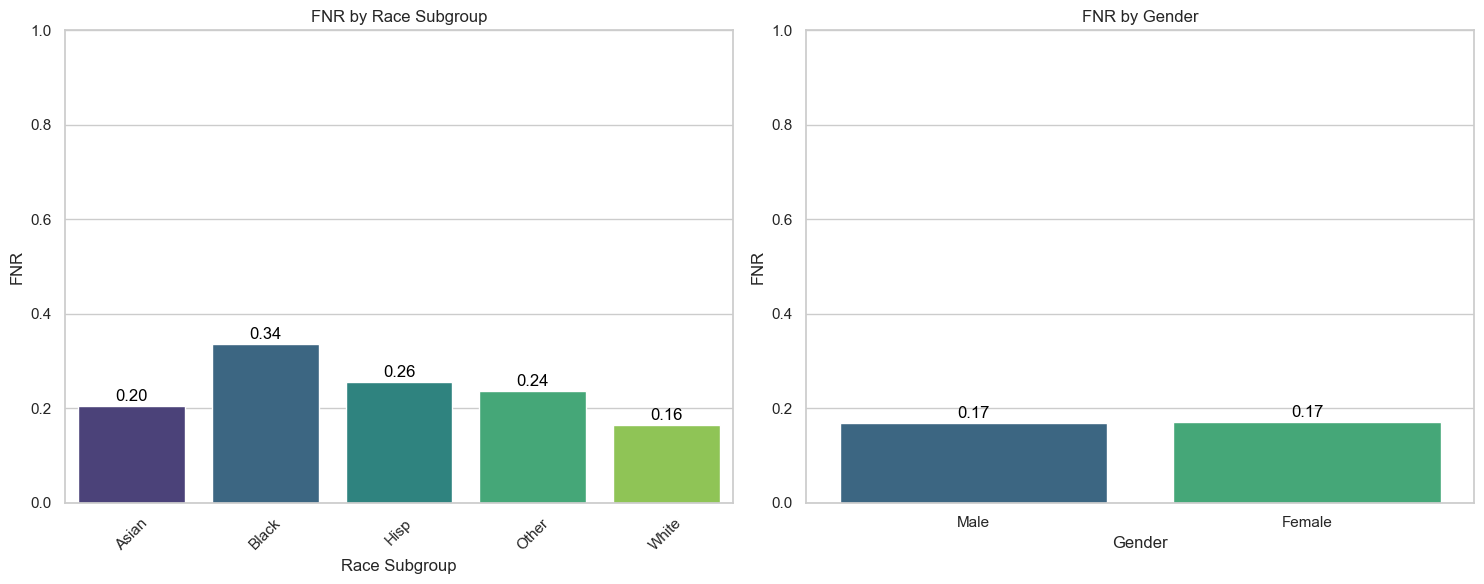

In [40]:
# Extract accuracy scores for each race subgroup
race_subgroups = [result['Group'] for result in results if result['Attribute'] == 'race1']
race_accuracy_scores = [result['FNR'] for result in results if result['Attribute'] == 'race1']

# Extract accuracy scores for each gender subgroup
gender_subgroups = [result['Group'] for result in results if result['Attribute'] == 'gender']
gender_accuracy_scores = [result['FNR'] for result in results if result['Attribute'] == 'gender']

# Create a DataFrame for plotting race accuracy
race_accuracy_df = pd.DataFrame({'Race Subgroup': race_subgroups, 'FNR': race_accuracy_scores})

# Create a DataFrame for plotting gender accuracy
gender_accuracy_df = pd.DataFrame({'Gender Subgroup': gender_subgroups, 'FNR': gender_accuracy_scores})

# Set plot style
sns.set(style="whitegrid")

# Create figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

# Plot for race accuracy scores
sns.barplot(x='Race Subgroup', y='FNR', data=race_accuracy_df, palette="viridis", ax=ax1)
ax1.set_title('FNR by Race Subgroup')
ax1.set_xlabel('Race Subgroup')
ax1.set_ylabel('FNR')
ax1.set_ylim(0, 1)  # Set y-axis limit from 0 to 1
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Annotate race accuracy scores on bars
for index, row in race_accuracy_df.iterrows():
    ax1.text(index, row['FNR'] + 0.01, f'{row["FNR"]:.2f}', color='black', ha="center")

# Plot for gender accuracy scores
sns.barplot(x='Gender Subgroup', y='FNR', data=gender_accuracy_df, palette="viridis", ax=ax2)
ax2.set_title('FNR by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('FNR')
ax2.set_ylim(0, 1)  # Set y-axis limit from 0 to 1
ax2.set_xticklabels(ax2.get_xticklabels())

# Annotate gender FNR scores on bars
for index, row in gender_accuracy_df.iterrows():
    ax2.text(index, row['FNR'] + 0.01, f'{row["FNR"]:.2f}', color='black', ha="center")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()